In [3]:
from tslearn.clustering import TimeSeriesKMeans
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("../../src")
from scipy.fft import fft
from FeaturesExtractorFromTSD import create_feature_dict_from_tsd
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
#from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [4]:
paths_to_csv = {}
path_tds_angles = '../../results/TSD_angles'
folders = [x[0] for x in os.walk(path_tds_angles)]
folders.remove(path_tds_angles)
for folder in folders:
    video_name = folder.split('\\')[-1]
    curr_paths_to_csv = [(f[:-4], os.path.join(folder, f)) for f in listdir(folder)]
    paths_to_csv[video_name] = curr_paths_to_csv
names_of_videos = [v for v in paths_to_csv.keys() if v != 'S008C']
names_of_videos.sort(key=lambda v: v[::-1])
print(names_of_videos)

['S001C', 'S002C', 'S002I', 'S003I', 'S005I', 'S001S', 'S004S', 'S009S']


In [7]:
num_of_metrics = len(paths_to_csv[names_of_videos[0]])

In [39]:
X_train = np.array([])

angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov
angl_bow_mov


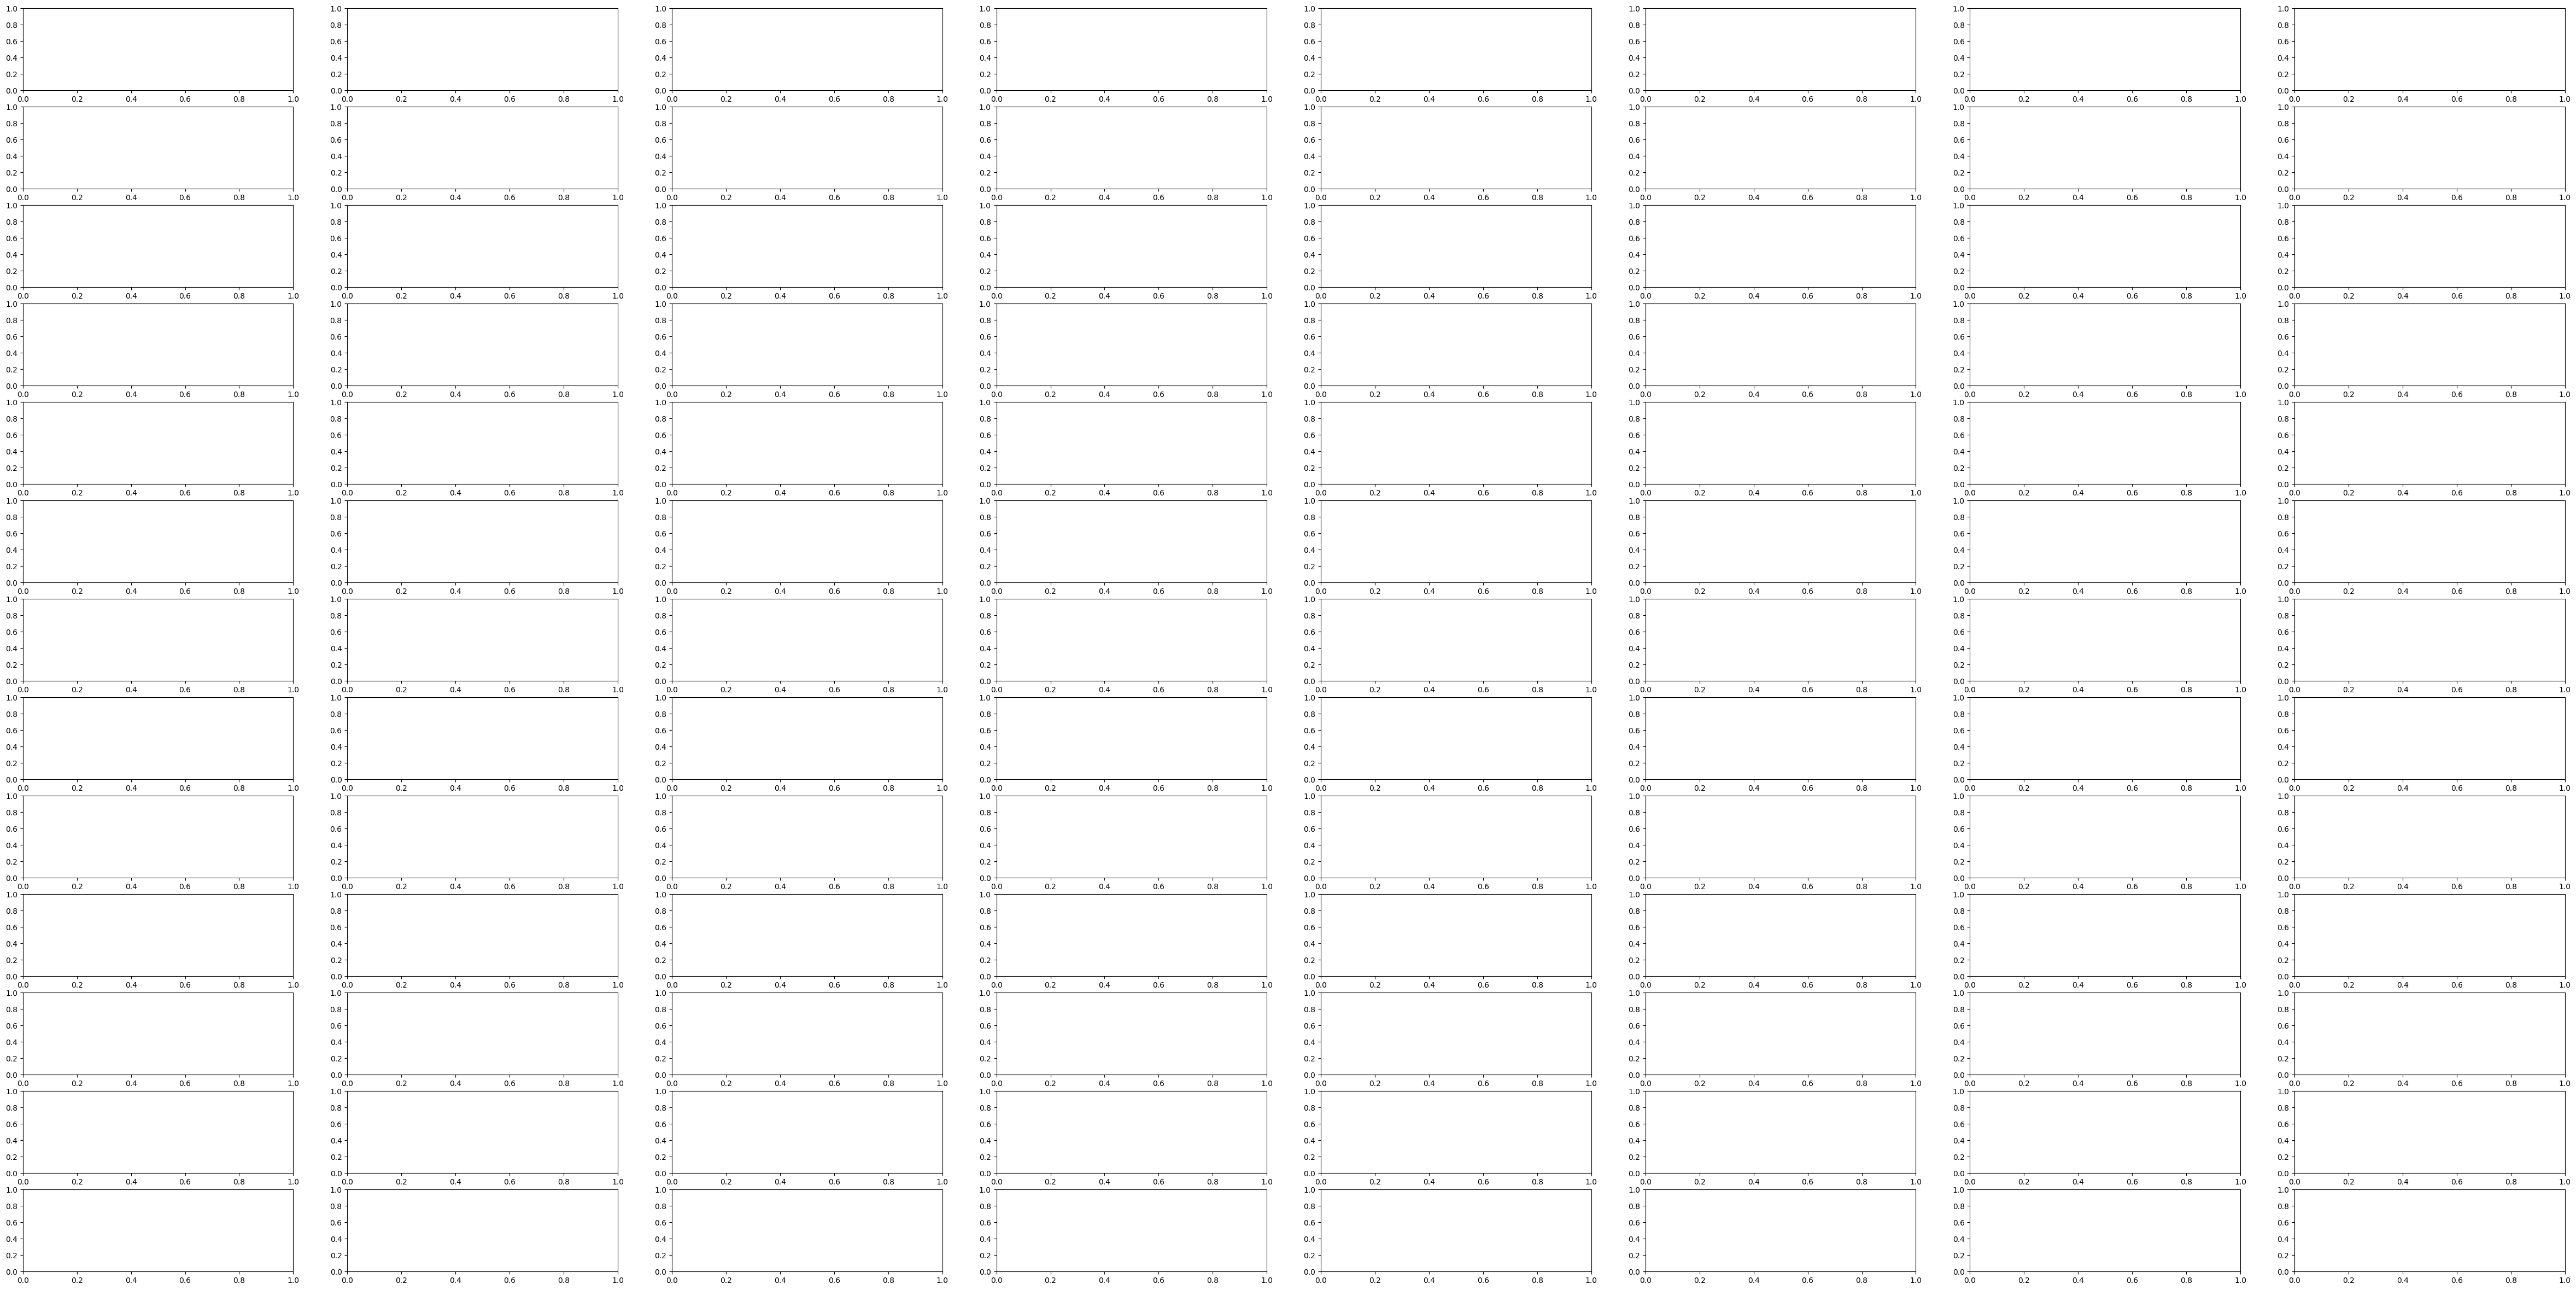

In [43]:
fig, axs = plt.subplots(len(paths_to_csv['S005I']),len(names_of_videos), figsize=(60, 30))
for i in range(len(names_of_videos)):
    for j in [0,]:
        curr_metric, curr_path = paths_to_csv[names_of_videos[i]][j]
        print(curr_metric)
        angles = pd.read_csv(curr_path)['angle'].to_list()
        np.append(X_train, np.array(angles))

In [14]:
#

c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [34]:
for i in range(len(X_train)):
    X_train[i]=np.array(X_train[i])
X_train = np.array(X_train)


c:\users\tmozo\documents\master\semester 4\computational vision\project\venv\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
X_train

array([], dtype=float64)

In [25]:
X_train.reshape(-1, 1)

array([[list([115.22126093218183, 115.69954272381636, 115.85817246949644, 115.22507119775965, 114.97960577867175, 113.47367103903656, 111.94052800501134, 111.75683654691916, 111.57623536925207, 110.5384672233546, 109.49973001511556, 109.5994145919799, 109.7491699524492, 110.09404193370828, 110.51466571040136, 110.41357074416902, 110.50390403943128, 110.58768311938852, 109.52042450078756, 108.67840935309808, 106.81609081938274, 103.97959403830332, 100.42711210176594, 99.17886979888164, 96.633337612658, 94.90784567846832, 92.93752282650736, 91.75799219964456, 90.69898299025408, 88.85239829127977, 87.43762463690177, 86.03972093364006, 84.06927416982145, 82.60299147858191, 82.20744417255261, 81.84686775707236, 82.19030395620521, 82.37305422499921, 82.79773688781881, 85.2809871127492, 87.71675071908282, 90.29423583275376, 93.0874825959806, 94.3028938622836, 95.9369868256162, 97.60174382318507, 99.35312533677023, 100.997298129902, 102.94420559132476, 104.98249063865867, 106.18936232257563, 1

In [30]:
X_train[0].shape

AttributeError: 'list' object has no attribute 'shape'

In [35]:
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma_sdtw": .01},
                           verbose=True,
                           random_state=1)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 200)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

Soft-DTW k-means


ValueError: setting an array element with a sequence.